# Emerging Technologies Project
## Cathal Butler | G00346889    
### References
* https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/index.html?index=..%2F..index#0
* https://www.tensorflow.org/guide/data_performance
* https://codelabs.developers.google.com/codelabs/keras-flowers-data/#3
* https://keras.io/examples/mnist_cnn/
* https://www.ics.uci.edu/~mohamadt/keras_mnist.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# The number of training examples in one forward/backward pass. 
# The higher the batch size, the more memory space you'll need.
batch_size = 128
num_classes = 10
# Setting the number of forward passes and backward passes of all the training examples
epochs = 10
# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.
/home/cathal/OneDrive - GMIT/Year_4_Software_Development/Emerging_Technologies/emerging-technologies-project/Emerging-Technologies-Project/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cathal/OneDrive - GMIT/Year_4_Software_Development/Emerging_Technologies/emerging-technologies-project/Emerging-Technologies-Project/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cathal/OneDrive - GMIT/Year_4_Software_Development/Emerging_Technologies/emerging-technologies-project/Emerging-Tec

## Load Data set

In [2]:
# Load data. The data, split between train and test sets:
(x_train, y_train), (X_test, y_test) = mnist.load_data()
# Print the original X & Y train shape:
print("Original X shape", x_train.shape)
print("Original Y shape", y_train.shape)

# Reshape data.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
x_test  /= 255
print("Training X matrix shape", x_train.shape)
print("Testing X matrix shape", X_test.shape)
print (y_train[0])    
    
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10
# Printing out the training and testing matrix shape
print("Training Y matrix shape", y_train.shape)
print("Testing Y matrix shape", y_test.shape)

Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 28, 28, 1)
Testing X matrix shape (10000, 28, 28)
5
Training Y matrix shape (60000,)
Testing Y matrix shape (10000,)


## Example Data

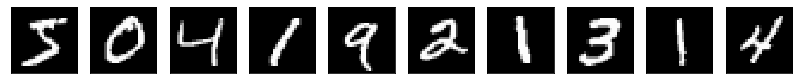

In [3]:
# Plot examples of the data.
plt.figure(1, figsize=(14,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## Keras Model
More information on Keras Sequential Models [here](https://keras.io/getting-started/sequential-model-guide/)

* Convolution Layer. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
* Using Relu & Softmax Layers

In [5]:
# Keras Model
model = Sequential()
# Convolution Layer:
# Input images with 3 channels:
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# Unflattened data
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Keras Model Summary

In [6]:
# Keras Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

## Compile the Keras Model
Compile the model to build each layer. The loss function is one of the two paramters required to compile the model. 
The second paramter is the optimizer, it is the algorithm used to update the weights.

In [7]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the model
Train the model and save the history. This will be used to plot the loss trajectory graph below. 

In [8]:
# Training the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
# Save the socores
score = model.evaluate(x_test, y_test, verbose=0)
# Display the test loss and test accuracy:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.2493 - accuracy: 0.9219 - val_loss: 0.0552 - val_accuracy: 0.9821
Epoch 2/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 3/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0313 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0268 - val_accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 31s 525us/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0260 - val_accuracy: 0.9914
Epoch 7/10
60000/60000 [==============================]

## Graph loss trajectory throughout training

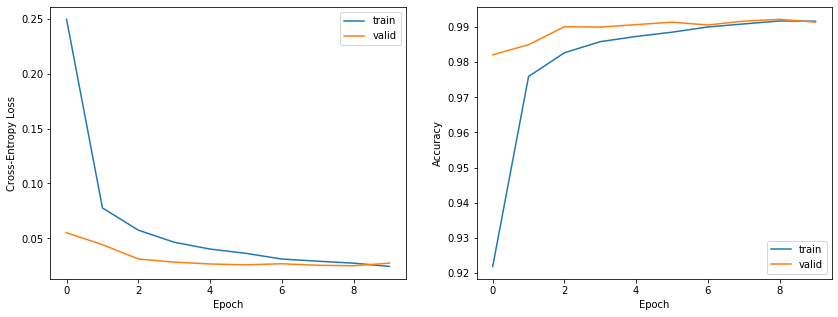

In [9]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Performance Evaluation

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.02754
Test accuracy: 0.99


In [11]:
print(score)

[0.027535542027934935, 0.9914000034332275]
